In [21]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import time
from sympy.printing.pretty.pretty_symbology import line_width

# Gradient descent algorithm for the function $x^2 - 4x + 1$

In [2]:
def function(x:float) -> float:
    return x**2 - 4 * x + 1

In [3]:
# Derivative of the function to find the minimum value
def gradient_function(x:float) -> float:
    return 2 * x - 4

In [84]:
def gradient_descent(start:float, gradient: Callable[[float], float], learn_rate:float, max_iter:int, tol:float=0.01):
    x = start
    steps = [start]  # Tracks x values

    for _ in range(max_iter):
        diff = learn_rate * gradient(x)
        if np.abs(diff) < tol:
            break
        x = x - diff
        steps.append(x)   # Tracks new x step value

    return steps, x

# Displaying the evolution of the gradient descent algorithm

In [57]:
def display_gradient_descent(history, learning_rate):
    # Function points
    x = np.linspace(-5, 10, 100)
    y = function(x)

    # Gradient descent step points evolution
    x_gradient = history
    y_gradient = [function(x) for x in x_gradient]


    # Displaying the chart for the function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='f(x) = x² - 4x + 1')

    # Adding the gradient descent points
    plt.scatter(x_gradient, y_gradient, color='red', s=20, zorder=5, label=f"Gradient descent steps")    # Displays the steps points
    plt.plot(x_gradient, y_gradient, 'r-', linewidth=1)    # Makes a line between steps points

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add title and labels
    plt.title(f"Quadratic Function: f(x) = x² - 4x + 1, learning rate: {learning_rate}")
    plt.xlabel('x')
    plt.ylabel('f(x)')

    # Add a simple text
    plt.text(2, 50, f"Iterations: {len(x_gradient)}\nresult: {round(x_gradient[-1], 4)}",
         fontsize=12,
         color='red',
         horizontalalignment='left')

    # Add legend
    plt.legend()

    # Add x and y axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.show()

# MAIN

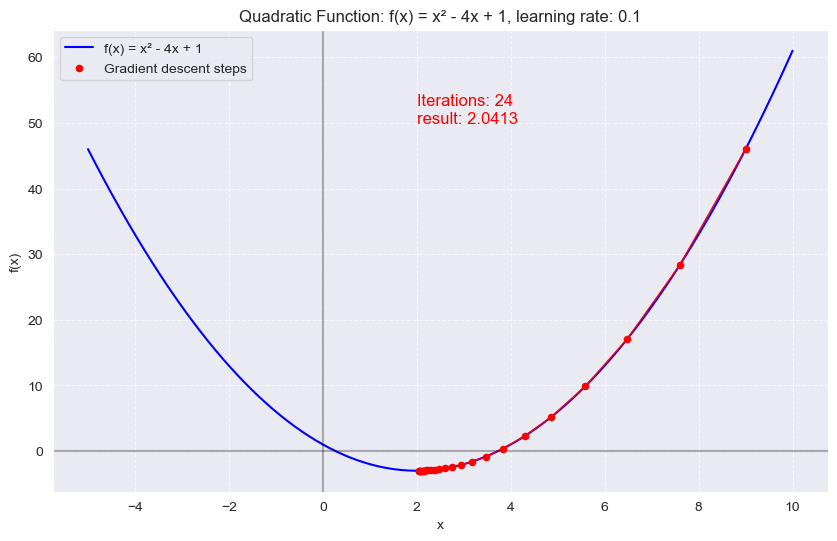

min of the function happens at: 2.041320706725109
Num iterations: 24
x steps history: [9, 7.6, 6.4799999999999995, 5.584, 4.8671999999999995, 4.29376, 3.8350079999999998, 3.4680063999999997, 3.17440512, 2.939524096, 2.7516192768, 2.60129542144, 2.481036337152, 2.3848290697216, 2.30786325577728, 2.246290604621824, 2.197032483697459, 2.1576259869579673, 2.1261007895663737, 2.100880631653099, 2.080704505322479, 2.064563604257983, 2.0516508834063862, 2.041320706725109]


In [58]:
learning_rate = 0.1
history, result = gradient_descent(9, gradient_function, learning_rate, 100)
display_gradient_descent(history, learning_rate)


print(f"min of the function happens at: {result}")
print(f"Num iterations: {len(history)}")
print(f"x steps history: {history}")

# Visalization dynamically the progress of the gradient descent

In all methods the animated image will be on a video file like MP4, GIF, etc. It's not visible in the notebook directly
**Method 1:** Using the PillowWriter

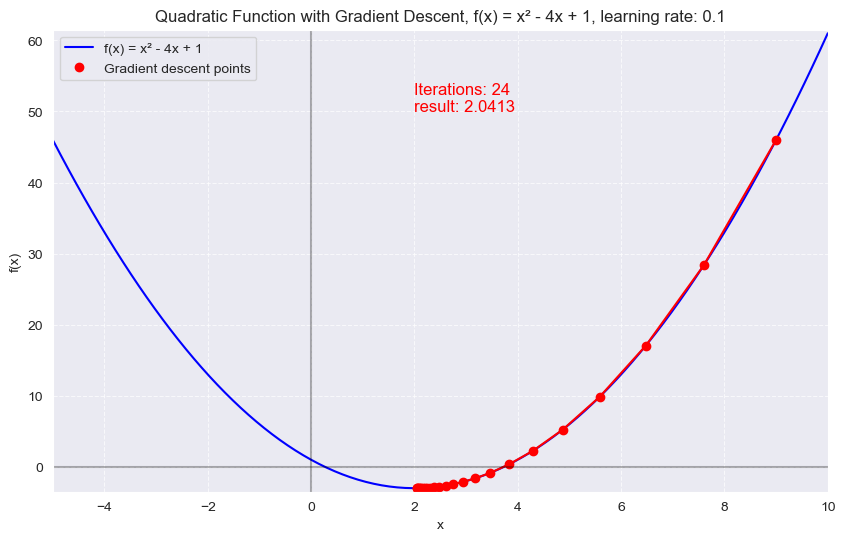

In [59]:
# Function points
x = np.linspace(-5, 10, 100)
y = function(x)

# Gradient descent step points evolution
x_gradient = history
y_gradient = [function(x) for x in x_gradient]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main function (this stays static)
line_function, = ax.plot(x, y, 'b-', label='f(x) = x² - 4x + 1')

# Initialize the points and line for animation
points, = ax.plot([], [], 'ro', label='Gradient descent points')
line, = ax.plot([], [], 'r-')

# Setup the plot
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f"Quadratic Function with Gradient Descent, f(x) = x² - 4x + 1, learning rate: {learning_rate}")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

# Add x and y axis lines
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set axis limits
ax.set_xlim(-5, 10)
ax.set_ylim(min(y)-0.5, max(y)+0.5)

# Add a simple text
plt.text(2, 50, f"Iterations: {len(x_gradient)}\nresult: {round(x_gradient[-1], 4)}",
         fontsize=12,
         color='red',
         horizontalalignment='left')

# Creating chart animation
metadata = dict(title='Movie', artist='Egma')
writer = PillowWriter(fps=15, metadata=metadata)

# Gradient descent step points evolution
x_points = []
y_points = []

with writer.saving(fig, "Gradient_descent_PillowWriter.gif", 100):
    for xval, yval in zip(x_gradient, y_gradient):
        x_points.append(xval)
        y_points.append(yval)

        points.set_data(x_points, y_points)
        line.set_data(x_points, y_points)

        writer.grab_frame()


**Method 2:** Using the FuncAnimation. This methods makes possible to have more control on the animation parameters like the delay between frames to increase or reduce the speed of the animation

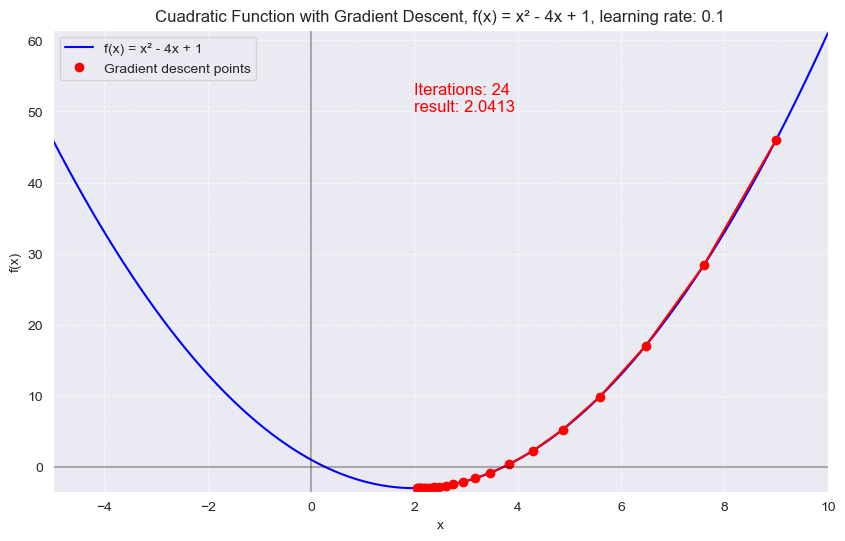

In [62]:
# Function points
x = np.linspace(-5, 10, 100)
y = function(x)

# Gradient descent step points evolution
x_gradient = history
y_gradient = [function(x) for x in x_gradient]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main function (this stays static)
line_function, = ax.plot(x, y, 'b-', label='f(x) = x² - 4x + 1')

# Initialize the points and line for animation
points, = ax.plot([], [], 'ro', label='Gradient descent points')
line, = ax.plot([], [], 'r-')

# Setup the plot
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f"Cuadratic Function with Gradient Descent, f(x) = x² - 4x + 1, learning rate: {learning_rate}")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

# Add x and y axis lines
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set axis limits
ax.set_xlim(-5, 10)
ax.set_ylim(min(y)-0.5, max(y)+0.5)

# Add a simple text
plt.text(2, 50, f"Iterations: {len(x_gradient)}\nresult: {round(x_gradient[-1], 4)}",
         fontsize=12,
         color='red',
         horizontalalignment='left')

# Creating chart animation
metadata = dict(title='Movie', artist='Egma')
writer = PillowWriter(fps=15, metadata=metadata)

# Generates the charts for each animation frame. Basically, it adds a data points at a time to generate a new frame in the animation
def update(num, x_points, y_points):

    # Update the points and line
    points.set_data(x_points[:num], y_points[:num])
    line.set_data(x_points[:num], y_points[:num])

    return points, line_gradient


anim = FuncAnimation(fig, update, frames=len(x_gradient),
                     interval=500,  # in ms between frames
                     blit=True,
                     repeat=False,
                     fargs=[x_gradient, y_gradient])

anim.save('Gradient_descent_FuncAnimation.gif', writer='pillow')


# Gradient descent algorithm for the function $x^4 - 2x^3 + 2$

In [87]:
def function_2(x:float) -> float:
    return x**4 - 2 * x**3 + 2

In [88]:
# Derivative of the function to find the minimum value
def gradient_function_2(x:float) -> float:
    return 4 * x**3 - 6 * x**2

In [118]:
def display_gradient_descent_2(history, learning_rate):
    # Function points
    x = np.linspace(-1, 2.5, 100)
    y = function_2(x)

    # Gradient descent step points evolution
    x_gradient = history
    y_gradient = [function_2(x) for x in x_gradient]


    # Displaying the chart for the function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', label='f(x) = x^4 - 2x^3 + 2')

    # Adding the gradient descent points
    plt.scatter(x_gradient, y_gradient, color='red', s=20, zorder=5, label=f"Gradient descent steps")    # Displays the steps points
    plt.plot(x_gradient, y_gradient, 'r-', linewidth=1)    # Makes a line between steps points

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add title and labels
    plt.title(f"Function: x^4 - 2x^3 + 2, learning rate: {learning_rate}")
    plt.xlabel('x')
    plt.ylabel('f(x)')

    # Add a simple text
    plt.text(0.5, 9, f"Iterations: {len(x_gradient)}\nresult: {round(x_gradient[-1], 4)}",
         fontsize=12,
         color='red',
         horizontalalignment='left')

    # Add legend
    plt.legend()

    # Add x and y axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.show()

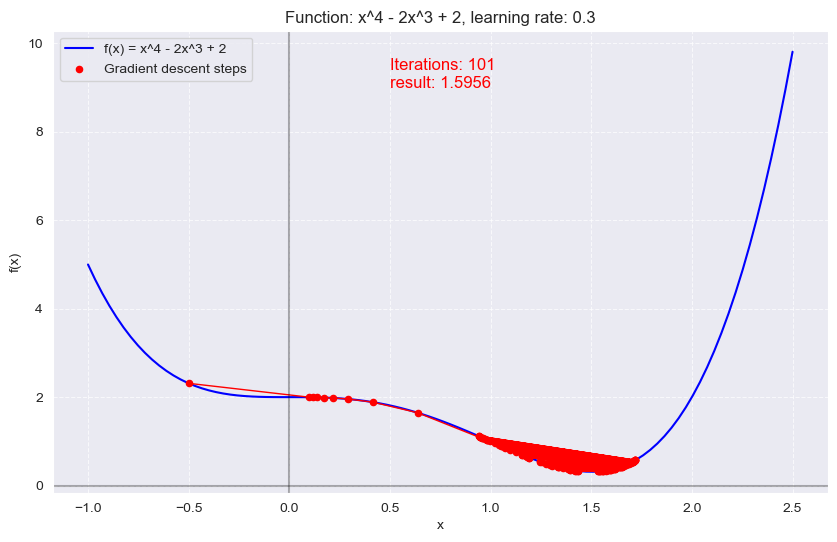

min of the function happens at: 1.5955858382783472
Num iterations: 101
x steps history: [-0.5, 0.09999999999999998, 0.11679999999999997, 0.13944393564159996, 0.17119051604543384, 0.21792133233725358, 0.290983980805998, 0.41382727756836546, 0.6370397026607622, 1.0572871280326779, 1.6511542540539295, 1.156642161574307, 1.7078637907412397, 0.9803075822922573, 1.5796187217832145, 1.3412216087275026, 1.6839686599698347, 1.0579416081097825, 1.651665166236616, 1.1551744745530905, 1.7073483056612457, 0.9820344184443454, 1.5814604049582477, 1.336979774588207, 1.6866610763524537, 1.0494392291430834, 1.6448945924080225, 1.1744488209358737, 1.7132998432090134, 0.9619563450541034, 1.559417243223825, 1.3860294942776776, 1.648764938748885, 1.1634771974423028, 1.710129894765032, 0.972688882421927, 1.5713707131053734, 1.3598959284989187, 1.6708121272328211, 1.0986024675838555, 1.679951675006863, 1.0705120083863973, 1.6611418123469095, 1.127557675575199, 1.6957793634026026, 1.0201837053078084, 1.6194405

In [123]:
learning_rate = 0.3
history, result = gradient_descent(-0.5, gradient_function_2, learning_rate, 100)
display_gradient_descent_2(history, learning_rate)

print(f"min of the function happens at: {result}")
print(f"Num iterations: {len(history)}")
print(f"x steps history: {history}")

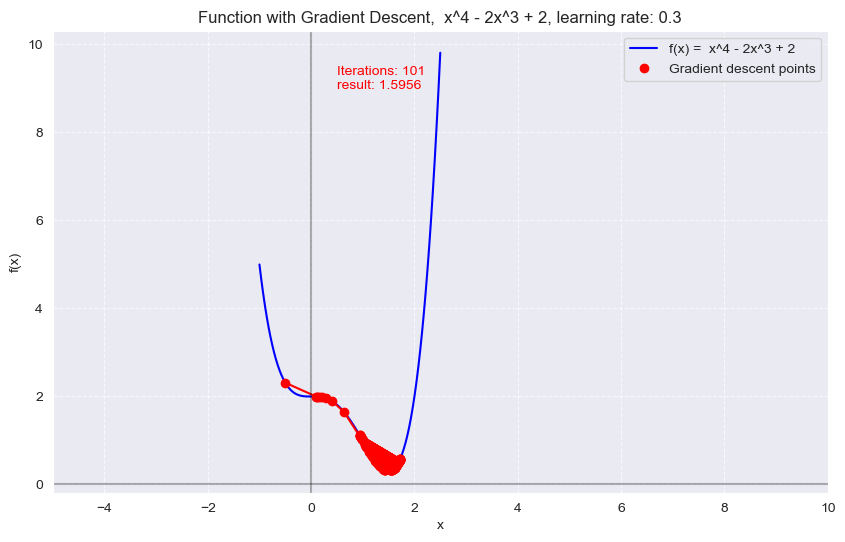

In [127]:
# Function points
x = np.linspace(-1, 2.5, 100)
y = function_2(x)

# Gradient descent step points evolution
x_gradient = history
y_gradient = [function_2(x) for x in x_gradient]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the main function (this stays static)
line_function, = ax.plot(x, y, 'b-', label='f(x) =  x^4 - 2x^3 + 2')

# Initialize the points and line for animation
points, = ax.plot([], [], 'ro', label='Gradient descent points')
line, = ax.plot([], [], 'r-')

# Setup the plot
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title(f"Function with Gradient Descent,  x^4 - 2x^3 + 2, learning rate: {learning_rate}")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

# Add x and y axis lines
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Set axis limits
ax.set_xlim(-5, 10)
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)

# Add a simple text
plt.text(0.5, 9, f"Iterations: {len(x_gradient)}\nresult: {round(x_gradient[-1], 4)}",
         fontsize=10,
         color='red',
         horizontalalignment='left')

# Creating chart animation
metadata = dict(title='Movie', artist='Egma')
writer = PillowWriter(fps=15, metadata=metadata)


# Generates the charts for each animation frame. Basically, it adds a data points at a time to generate a new frame in the animation
def update(num, x_points, y_points):
    # Update the points and line
    points.set_data(x_points[:num], y_points[:num])
    line.set_data(x_points[:num], y_points[:num])

    return points, line_gradient


anim = FuncAnimation(fig, update, frames=len(x_gradient),
                     interval=500,  # in ms between frames
                     blit=True,
                     repeat=False,
                     fargs=[x_gradient, y_gradient])

anim.save('Gradient_descent_FuncAnimation_x4.gif', writer='pillow')
